<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K_20201115_to_20201120163500.pkl')

In [348]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [349]:
df.drop('time', axis=1, inplace=True)

In [350]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [351]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-15 18:00:00')

In [352]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [353]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0


In [354]:
df["mu10min"] = df.avg.rolling(window=120, min_periods=1).mean()

df["mu5min"] = df.avg.rolling(window=60, min_periods=1).mean()
df["mu2min"] = df.avg.rolling(window=24, min_periods=1).mean()
df["mumin"] = df.avg.rolling(window=12, min_periods=1).mean()
df["dev"] = df.close - df.open

df["delta1m"] = df.avg - df.mumin
df["delta2m"] = df.avg - df.mu2min

df["delta5m"] = df.avg - df.mu5min
df["delta10m"] = df.avg - df.mu10min
 

In [355]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0,1747.970000,1747.970000,1747.970000,1747.970000,-2.0,0.000000,0.000000,0.000000,0.000000
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0,1748.570000,1748.570000,1748.570000,1748.570000,0.4,0.600000,0.600000,0.600000,0.600000
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0,1748.606667,1748.606667,1748.606667,1748.606667,-1.9,0.073333,0.073333,0.073333,0.073333
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0,1748.612500,1748.612500,1748.612500,1748.612500,0.4,0.017500,0.017500,0.017500,0.017500
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0,1748.736000,1748.736000,1748.736000,1748.736000,0.5,0.494000,0.494000,0.494000,0.494000


In [356]:

df["pbmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5*12)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10*12)).fillna(0.0)
df["pb15min"] = (df.avg - df.avg.shift(periods=15*12)).fillna(0.0)
df["pb30min"] = (df.avg - df.avg.shift(periods=30*12)).fillna(0.0)
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min
0,1747.9,1750.0,1745.0,1745.9,1747.97,44,2020-11-15 18:00:00,18,0,0,15,0,1747.970000,1747.970000,1747.970000,1747.970000,-2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1748.8,1749.5,1748.8,1749.2,1749.17,3,2020-11-15 18:00:05,18,0,5,15,0,1748.570000,1748.570000,1748.570000,1748.570000,0.4,0.600000,0.600000,0.600000,0.600000,0.0,0.0,0.0,0.0,0.0
2,1749.1,1749.1,1747.2,1747.2,1748.68,18,2020-11-15 18:00:10,18,0,10,15,0,1748.606667,1748.606667,1748.606667,1748.606667,-1.9,0.073333,0.073333,0.073333,0.073333,0.0,0.0,0.0,0.0,0.0
3,1748.5,1748.9,1748.5,1748.9,1748.63,3,2020-11-15 18:00:15,18,0,15,15,0,1748.612500,1748.612500,1748.612500,1748.612500,0.4,0.017500,0.017500,0.017500,0.017500,0.0,0.0,0.0,0.0,0.0
4,1749.0,1749.5,1748.6,1749.5,1749.23,9,2020-11-15 18:00:20,18,0,20,15,0,1748.736000,1748.736000,1748.736000,1748.736000,0.5,0.494000,0.494000,0.494000,0.494000,0.0,0.0,0.0,0.0,0.0


In [357]:
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df["pf2min"] = (df.avg.shift(-2*12)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5*12)-df.avg).fillna(0.0)
df["pf10min"] = (df.avg.shift(-10*12)-df.avg).fillna(0.0)
df["pf15min"] = (df.avg.shift(-15*12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min,pfmin,pf2min,pf5min,pf10min,pf15min
81595,1779.6,1779.6,1779.6,1779.6,1779.60,0,2020-11-20 16:34:35,16,34,35,20,4,1779.836833,1779.323167,1779.475417,1779.544167,0.0,0.055833,0.124583,0.276833,-0.236833,-0.45,0.75,-3.02,-4.30,-6.71,0.0,0.0,0.0,0.0,0.0
81596,1779.4,1779.4,1779.4,1779.4,1779.40,1,2020-11-20 16:34:40,16,34,40,20,4,1779.809583,1779.334000,1779.467083,1779.541667,0.0,-0.141667,-0.067083,0.066000,-0.409583,-0.03,0.65,-3.27,-4.83,-7.00,0.0,0.0,0.0,0.0,0.0
81597,1779.4,1779.4,1778.9,1778.9,1779.08,4,2020-11-20 16:34:45,16,34,45,20,4,1779.780250,1779.343667,1779.459167,1779.490000,-0.5,-0.410000,-0.379167,-0.263667,-0.700250,-0.62,0.58,-3.52,-4.75,-6.81,0.0,0.0,0.0,0.0,0.0
81598,1778.9,1778.9,1778.9,1778.9,1778.90,0,2020-11-20 16:34:50,16,34,50,20,4,1779.751833,1779.343167,1779.442500,1779.431667,0.0,-0.531667,-0.542500,-0.443167,-0.851833,-0.70,-0.03,-3.41,-4.90,-7.43,0.0,0.0,0.0,0.0,0.0
81599,1778.7,1778.7,1778.6,1778.6,1778.65,8,2020-11-20 16:34:55,16,34,55,20,4,1779.722250,1779.327500,1779.411250,1779.348333,-0.1,-0.698333,-0.761250,-0.677500,-1.072250,-1.00,-0.94,-3.55,-5.05,-7.36,0.0,0.0,0.0,0.0,0.0


In [ ]:
a4_dims = (23,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x=df.pfmin, y=df.delta1m)

In [358]:
df.columns[11:33]

Index(['TradeDay', 'mu10min', 'mu5min', 'mu2min', 'mumin', 'dev', 'delta1m',
       'delta2m', 'delta5m', 'delta10m', 'pbmin', 'pb5min', 'pb10min',
       'pb15min', 'pb30min', 'pfmin', 'pf2min', 'pf5min', 'pf10min',
       'pf15min'],
      dtype='object')

In [359]:
df.drop(df.head(30*12).index, inplace=True)
df.drop(df.tail(15*12).index, inplace=True)

In [360]:
df.shape[0]

81060

In [361]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [362]:
df.columns[16:27]

Index(['dev', 'delta1m', 'delta2m', 'delta5m', 'delta10m', 'pbmin', 'pb5min',
       'pb10min', 'pb15min', 'pb30min', 'pfmin'],
      dtype='object')

In [363]:
data = df[df.columns[16:27]]

In [ ]:
data

,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min,pfmin
360,0.1,0.973333,1.238333,0.252167,-1.336583,1.36,-1.88,-3.95,-6.30,4.48,1.35
361,-0.3,1.209167,1.550417,0.663500,-0.928333,1.73,-1.88,-3.39,-5.69,3.66,0.97
362,0.0,0.845833,1.262083,0.470167,-1.129167,1.60,-2.20,-3.50,-5.20,3.92,0.90
363,0.3,1.381667,1.897500,1.224667,-0.376083,2.33,-1.47,-2.77,-4.19,4.70,0.32
364,0.0,1.490000,2.100000,1.573667,-0.024083,2.66,-1.14,-2.64,-3.42,4.43,-0.23
...,...,...,...,...,...,...,...,...,...,...,...
81415,0.0,0.185833,0.120417,0.259833,-0.110417,0.30,-0.49,-1.10,-2.41,3.88,0.40
81416,0.0,0.447500,0.438750,0.586000,0.222417,0.82,0.23,-0.34,-2.17,4.15,0.27
81417,-0.5,0.025833,0.047083,0.166500,-0.173833,0.26,1.17,-0.45,-2.06,3.68,0.68
81418,0.0,0.005000,0.032083,0.120333,-0.202000,-0.11,0.97,-0.22,-2.53,3.60,0.60


In [364]:
data.reset_index(inplace=True, drop=True)
label = data.pfmin
data = data[data.columns[:-1]]

In [365]:
data

,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min
0,0.1,0.973333,1.238333,0.252167,-1.336583,1.36,-1.88,-3.95,-6.30,4.48
1,-0.3,1.209167,1.550417,0.663500,-0.928333,1.73,-1.88,-3.39,-5.69,3.66
2,0.0,0.845833,1.262083,0.470167,-1.129167,1.60,-2.20,-3.50,-5.20,3.92
3,0.3,1.381667,1.897500,1.224667,-0.376083,2.33,-1.47,-2.77,-4.19,4.70
4,0.0,1.490000,2.100000,1.573667,-0.024083,2.66,-1.14,-2.64,-3.42,4.43
...,...,...,...,...,...,...,...,...,...,...
81055,0.0,0.185833,0.120417,0.259833,-0.110417,0.30,-0.49,-1.10,-2.41,3.88
81056,0.0,0.447500,0.438750,0.586000,0.222417,0.82,0.23,-0.34,-2.17,4.15
81057,-0.5,0.025833,0.047083,0.166500,-0.173833,0.26,1.17,-0.45,-2.06,3.68
81058,0.0,0.005000,0.032083,0.120333,-0.202000,-0.11,0.97,-0.22,-2.53,3.60


In [366]:
x=data.values
y=label.values


In [367]:
model = lgb.Booster(model_file='/content/drive/MyDrive/TWS/M2K_lgm_20201205.lgm')

In [368]:
y_p = model.predict(x)

In [369]:
from sklearn.metrics import mean_squared_error

In [370]:
mean_squared_error(y, y_p) ** 0.5

1.2225006780609828

In [377]:
"{0:.4f}".format(stat.pearsonr(y, y_p)[0])

'-0.0040'

In [371]:
stat.pearsonr(y, y_p)

(-0.004014593151675796, 0.2530455174063247)

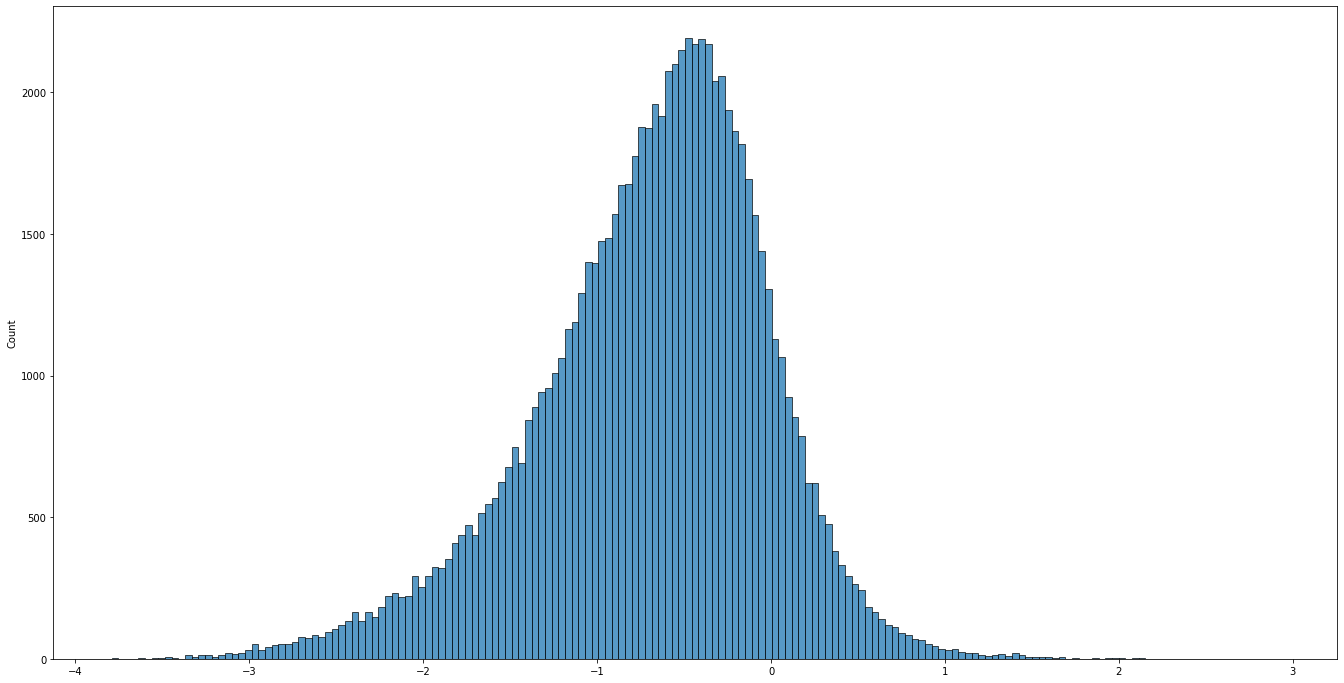

In [373]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(y_p)

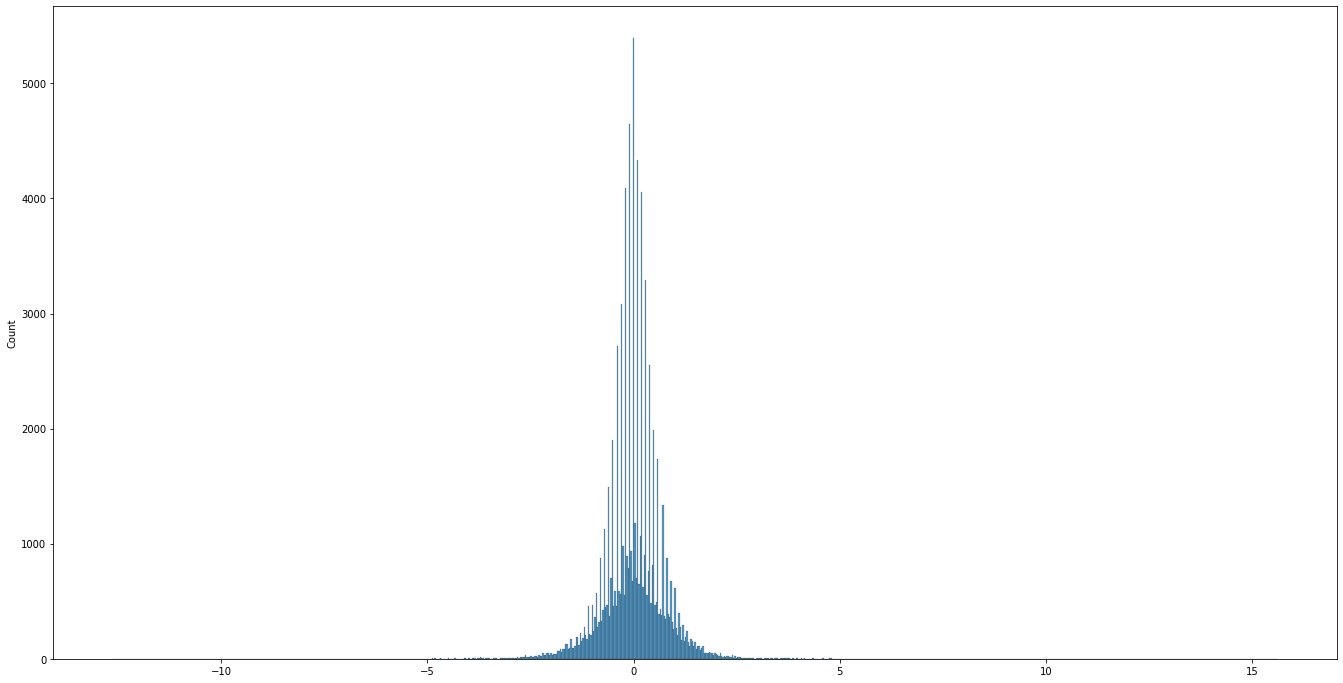

In [374]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(y)